# Welcome to the course!

This is meant to be a very broad overview of machine learning topics, hopefully enough that you can hold a conversation about the topics we cover, but probably not enough to land a job as an ML engineer. There will be resources at the end if you want to know more :) 


## Schedule 

1. General Overview
2. Fitting Models
3. Validating Models
4. Interpreting Results
5. Wrapping Up

## Pre-reqs
1. Watch this Essence of Linear Algebra playlist: https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab
2. Working intermediate Python knowledge (but if you're rusty that's okay, I am too)
   - in particular, basic understanding of numpy, pandas, scipy, statsmodels, scikitlearn
   - if you aren't familiar with some of these, that's okay too, just look over their documentation

# Math Interlude 

Math can be scary, believe me, I understand. But fundamentally, machine learning is using some fancy-looking math to make predictions about things we're interested in. If you don't have a formal math background, that's okay too, but I want to get some concepts reviewed so you can make sense of formulas and notation you see in other resources.

notation

\begin{pmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22}
\end{pmatrix}

Also note the subscripts, those are used pretty frequently to denote "different" objects of the same type. So we might want to compare means (averages) between two different groups of people. Instead of saying "mean of people x vs mean of people y" we usually just write this: 

$\mu_1$ vs. $\mu_2$

This is read as "mu 1 vs. mu 2" or "mu-sub-1 vs. mu-sub-2"

You will also often see a variety of letters used to denote "arbitrary" numbers. This sounds insane at first, because, why would we talk about hypothetical numbers? But they're often used to generalize models to an arbitrary number of variables, parameters, whatever. For example, if we want to describe a linear model to someone, and we say "just use every variable you have" we can write: fit the model with $x_1, x_2, \dots x_j$. The $j$ here is just a placeholder value. If we have &j = 5& variables, we would write $x_1, x_2, x_3, x_4, x_5$. Some common letters for this type of mathematical writing are $n$, $m$, $j$, $k$, and many others, but helpful to stick to those because they're convention. 

If you get more into ML, it will be essential to either take a linear algebra course or just read a textbook, but just being aware of the concepts is enough for now :) 

# General Overview

What is machine learning? 

*"a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions"* (wikipedia)

There are 3 main types: 

1. Supervised learning: we "know" our outcome data
2. Unsupervised learning: we don't know our outcome data, we want to find patterns
3. Reinforcement learning: exploration - exploitation (I know the least about this, so we won't cover it!)

There are plenty of other types and subfields, but these three categories cover most of it. Almost everything uses some blend of math, statistics, probability, and programming to create a machine learning model. 

I am a statistician by training, and we really like linear models, so some of this may be slightly more statistics-focused, and I will definitely use statistics-based notation. There are usually many different ways to write mathematical formulas depending on the field, even though they share similar ideas.

Here's our framework for machine learning: 

1. Identify the question we want to answer.
2. Identify possible models and approaches.
3. Fit the models.
4. Evaluate the models for accuracy.
5. Interpret and communicate your results (or deploy to production).

In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

# Supervised Learning

## Linear Regression: a basic example

This is "supervised" in the sense that we have a known outcome variable, often denoted $Y$. The most basic type of supervised learning is a linear model, you may have seen these before. In two dimensions, this is just $y = mx + b$ where: 

\begin{aligned}
y &= \text{outcome variable} \\ 
m &= \text{slope} \\ 
x &= \text{our predictor variable} \\ 
b &= \text{intercept}
\end{aligned}

Note that there are 100 names for $x$ and $y$, here are some of them. x is called a covariate, an independent variable, a predictor variable, or just "x". y is called the target variable, the dependent variable, the outcome variable, "variable of interest", "endpoint" (in clinical trials), or just "y". The b's or betas are almost always called coefficients or betas, though in other ML models they can be called parameters or weights. But trust me, it's kind of arbitrary. 

Say you, a normal person, go out and dig up 50 earthworms in your neighborhood, weigh them and measure them, and put them back in the ground. This is your data: 

In [19]:
# Generate random data
np.random.seed(0)  # For reproducibility
x = np.random.rand(100).reshape(-1, 1) # we have to reshape to make python happy 
y = 2 * x + 1 + np.random.randn(100).reshape(-1, 1) * 0.5

data = pd.DataFrame({'Weight (g) -> x': x.flatten(), 'Length (cm) -> y': y.flatten()}) # just for viewing our data
data.head()

,Weight (g) -> x,Length (cm) -> y
0,0.548814,1.515052
1,0.715189,2.880792
2,0.602763,2.438358
3,0.544883,1.321645
4,0.423655,2.591436


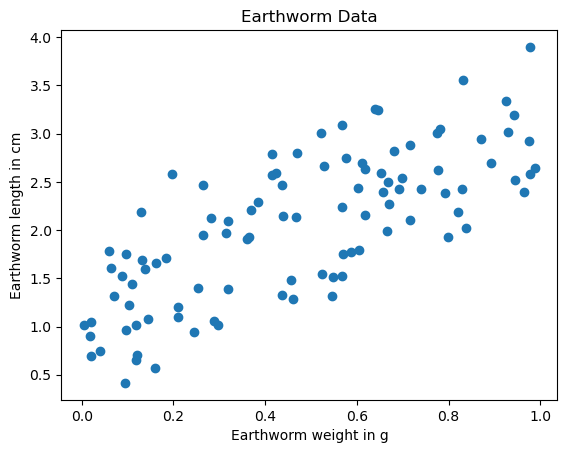

In [6]:
# Plotting the points
plt.scatter(x, y)
plt.title("Earthworm Data")
plt.xlabel("Earthworm weight in g")
plt.ylabel("Earthworm length in cm")
plt.show()

If we wanted to write our mathematical formula for fitting a model to this data, we would write: 

$y_{\text{length}} = \beta_0 + \beta_1 \cdot x_{\text{weight}}$ (notice that this is just y = mx + b)! 

### The test train-split

We don't want to fit our model on all the data we have, because we wouldn't be able to evaluate how good the model is on "unseen" data. This would be a bit like playing poker in practice rounds but you knew what cards the other players had. But, in real competitions, you wouldn't know. So you'd seem really good in practice but really bad in real games! 

This is extremely important: 

**DON'T TRAIN YOUR MODEL WITH TEST DATA!**

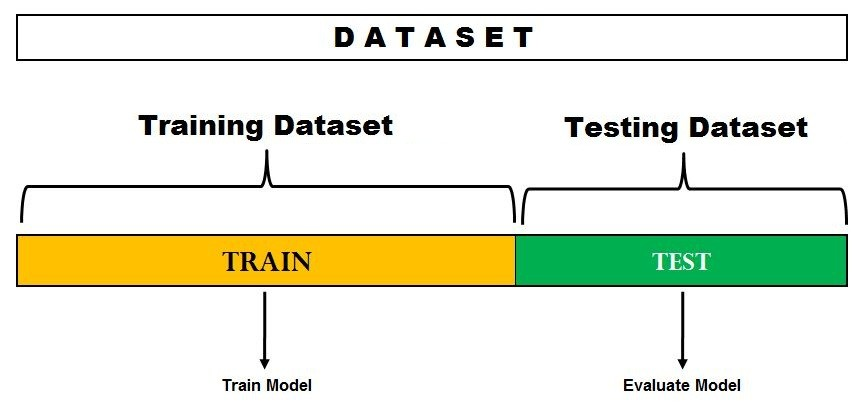

Fortunately, (almost?) everything you need is already available as a function. Try to rely on these built-in functions from different libraries for simplicity and time savings!

Aside: I constantly manually inspect objects or print them out so I know what I'm working with. 

In [7]:
# Split the data into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [20]:
x_train[0:5]

array([[0.15896958],
       [0.58651293],
       [0.52184832],
       [0.94466892],
       [0.79915856]])

In [9]:
y_train[0:5]

array([[0.57231037],
       [1.77132104],
       [3.00516766],
       [2.51561043],
       [1.9244376 ]])

In [10]:
# we did an 80 / 20 split which is common 
print(f"Total size of x: {len(x)}\n size of x_train: {len(x_train)}\n size of x_test: {len(x_test)}")

Total size of x: 100
 size of x_train: 80
 size of x_test: 20


### Fitting our first model!

Are you ready for the big reveal? When we say "fitting a model" or you hear someone say they have a machine learning model, they just have coefficient estimates. That's all it is, that's the whole game. 

In [11]:
# Fit the model 
model = LinearRegression() 
model.fit(x_train, y_train)

LinearRegression()

Here are the coefficients: 

In [25]:
# Print the results 
print("Coefficients:", model.coef_) 
print("Intercept:", model.intercept_) 

Coefficients: [[1.99990042]]
Intercept: [1.10517591]


### Interpreting Results

This is what sets you apart from a machine.

First, we can write our model based on the formula from above (the little carrot or "hat" indicates a predicted or estimated value): 

$\hat{y_{\text{length}}} = \hat{\beta_0} + \hat{\beta_1} \cdot x_{\text{weight}} = 1.1 + 1.99 \cdot x_{\text{weight}}$

We interpret these results as follows: 

1. at weight = 0g, we think on average a given earthworm will be 1.13 cm long. Of course, 0g is not a possible weight, so this intercept is not particularly meaningfull.
2. But, as we plug in weights we see the magic. For each 1 unit increment in weight, we expect to see length increase by 1.95 cm. 


### Some Predictions by Hand

To predict values, all we have to do is plug in values for $x_{weight}$. Say we find a worm that is 2g, how long do we think it is? 

$\hat{length} = 1.11 + 1.99 * 2 = 5.09 \text{ cm long}$ 

All we're doing is plugging in "new" values and predicting. Of course, we could just measure how long our worm is to confirm, but sometimes this isn't possible with your data. For example, if you're predicting the result of an NFL football game that hasn't happened yet. However, say we measure the worm and it's 5.5 cm long. So we were off by a little bit. This is the **error** of our prediction. Formally: 

$\text{error} = y - \hat{y} = 5.5 - 5.09 = 0.41$

Of course, we don't want to do this by hand for hundreds of new observations. We can confirm that we did the math correctly by hand with  ```model.predict()```

In [22]:
# what if we want to do this with code? 
new_obs = np.array([[2]]) # our 2g worm 
pred = model.predict(new_obs)
pred[0][0]

5.104976758498696

In [26]:
# on more than one observation
# _pred for prediction is a common convention
y_pred = model.predict(x_test)

y_pred[0:5]

array([[2.74708062],
       [2.04243165],
       [1.52290863],
       [2.25701155],
       [1.23346452]])

### Metrics for evaluating model fit

In [27]:
# Evaluate the model 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print("Mean Squared Error:", mse) 
print("R-squared:", r2)

Mean Squared Error: 0.20279015717455237
R-squared: 0.5800397295913791


# Other Supervised Learning Methods

## logistic regression 

## K-nearest neighbors (or KNN) 

## Neural Nets

# Unsupervised Learning

## k-means

## PCA 

overfit / underfit 

k-fold cross validation 

bias-variance tradeoff 